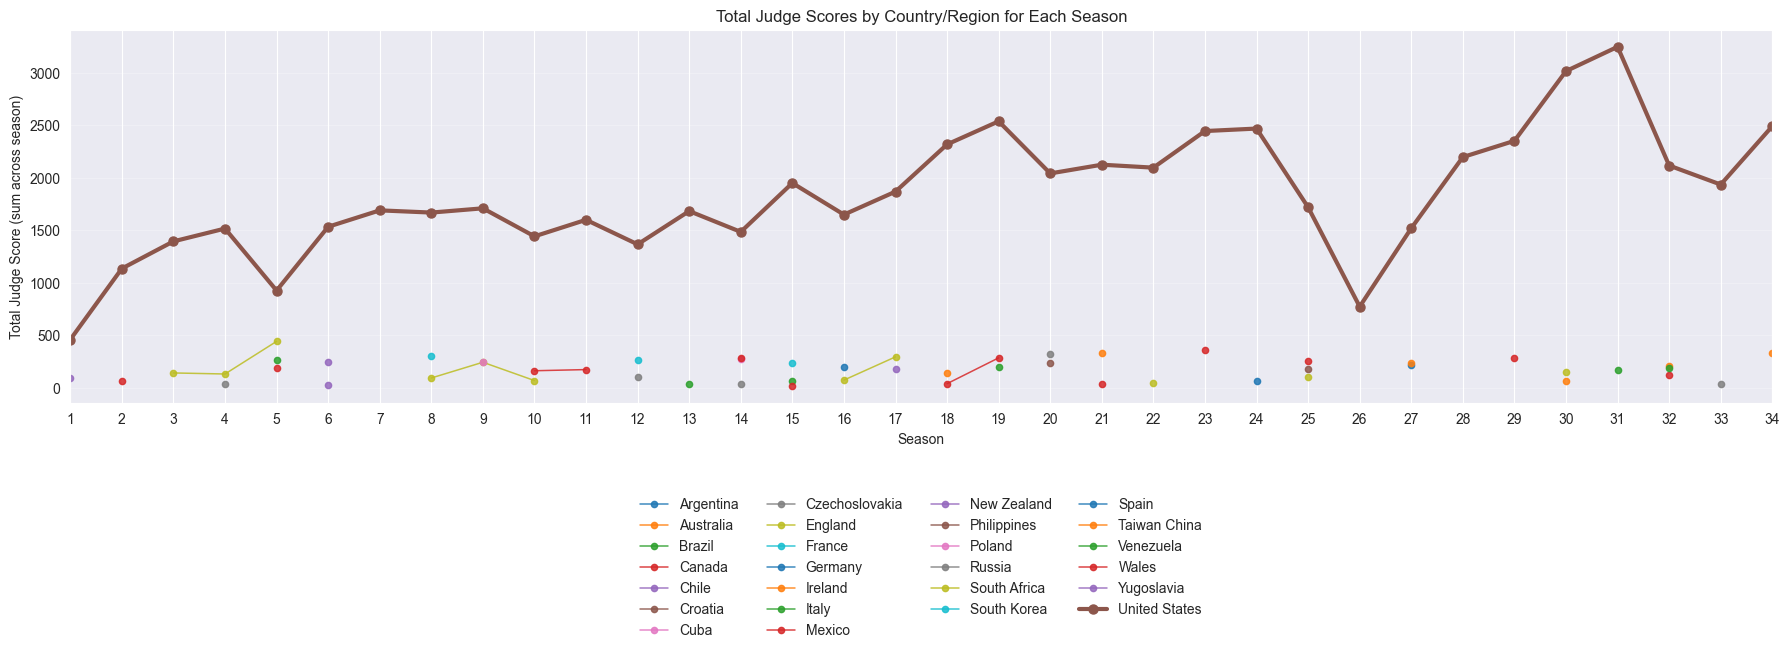

✅ 已导出：country_total_judge_scores_by_season.png
主线突出国家：United States


In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "2026_MCM_Problem_C_Data.csv"
df = pd.read_csv(csv_path)

score_cols = [c for c in df.columns if re.match(r"week\d+_judge\d+_score", c)]
df["total_judge_score"] = df[score_cols].sum(axis=1, skipna=True)

grouped = (
    df.groupby(["season", "celebrity_homecountry/region"], as_index=False)["total_judge_score"]
      .sum()
)

pivot = grouped.pivot_table(
    index="season",
    columns="celebrity_homecountry/region",
    values="total_judge_score",
    aggfunc="sum"
).sort_index()

pivot = pivot.reindex(range(1, 35))

top_country = pivot.sum(axis=0, skipna=True).sort_values(ascending=False).index[0]

plt.figure(figsize=(18, 7))
ax = plt.gca()

for country in sorted(pivot.columns):
    if country == top_country:
        continue
    ax.plot(
        pivot.index,
        pivot[country],
        marker="o",
        markersize=4.5,
        linewidth=1.1,
        alpha=0.85,
        label=country
    )

ax.plot(
    pivot.index,
    pivot[top_country],
    marker="o",
    markersize=6.5,
    linewidth=3.0,
    label=top_country
)

ax.set_xlim(1, 34)
ax.set_xticks(range(1, 35))
ax.set_xticklabels(range(1, 35), rotation=0)

ax.grid(True, axis="y", linestyle="-", alpha=0.25)
ax.set_xlabel("Season")
ax.set_ylabel("Total Judge Score (sum across season)")
ax.set_title("Total Judge Scores by Country/Region for Each Season")

ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=10,
    frameon=False
)

plt.tight_layout()

out_path = "country_total_judge_scores_by_season.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"✅ 已导出：{out_path}")
print(f"主线突出国家：{top_country}")


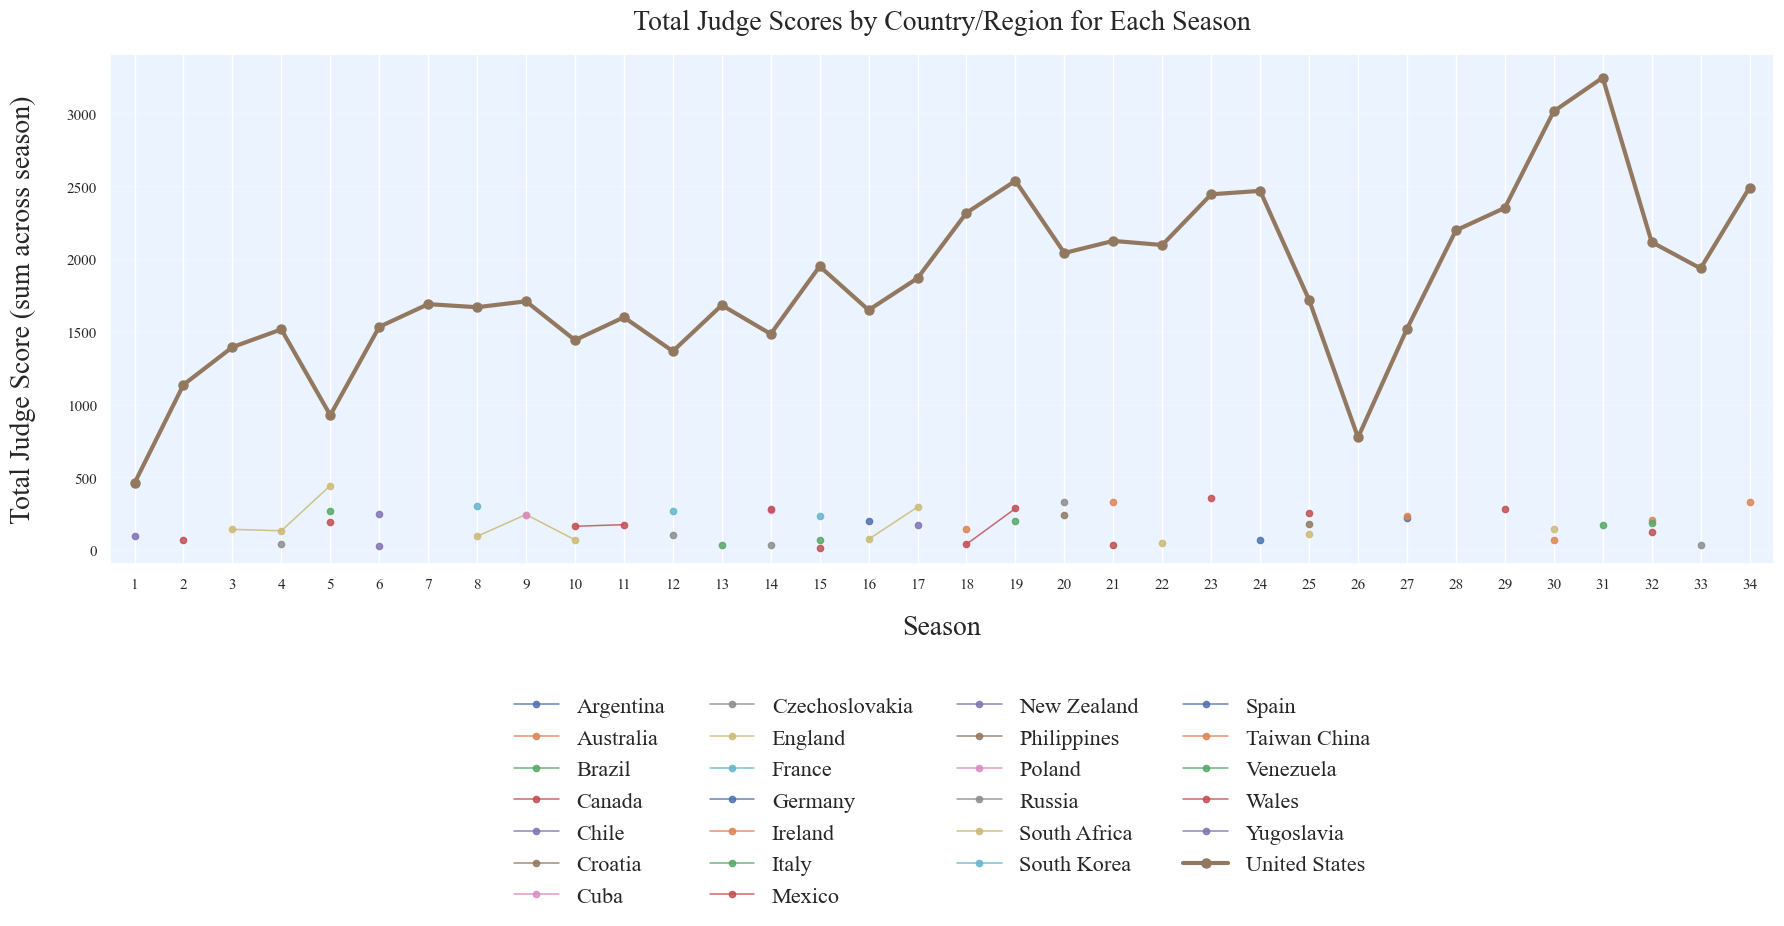

✅ 已导出：country_total_judge_scores_by_season.png
主线突出国家：United States


<Figure size 640x480 with 0 Axes>

In [39]:
import re
import pandas as pd
import matplotlib.pyplot as plt

mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["axes.unicode_minus"] = False



df = pd.read_csv(csv_path)

score_cols = [c for c in df.columns if re.match(r"week\d+_judge\d+_score", c)]
df["total_judge_score"] = df[score_cols].sum(axis=1, skipna=True)

grouped = (
    df.groupby(["season", "celebrity_homecountry/region"], as_index=False)["total_judge_score"]
      .sum()
)

pivot = grouped.pivot_table(
    index="season",
    columns="celebrity_homecountry/region",
    values="total_judge_score",
    aggfunc="sum"
).sort_index()

pivot = pivot.reindex(range(1, 35))

top_country = pivot.sum(axis=0, skipna=True).sort_values(ascending=False).index[0]

plt.figure(figsize=(18, 10))
ax = plt.gca()

for country in sorted(pivot.columns):
    if country == top_country:
        continue
    ax.plot(
        pivot.index,
        pivot[country],
        marker="o",
        markersize=4.5,
        linewidth=1.1,
        alpha=0.85,
        label=country
    )

ax.plot(
    pivot.index,
    pivot[top_country],
    marker="o",
    markersize=6.5,
    linewidth=3.0,
    label=top_country
)

ax.set_xlim(0.5, 34.5)

ax.set_xticks(range(1, 35))
ax.set_xticklabels(range(1, 35), rotation=0)


ax.set_facecolor("#EAF3FF")
ax.grid(True, axis="y", linestyle="-", alpha=0.25)


ymax = pivot.max(axis=1, skipna=True).max()

ax.grid(True, axis="y", linestyle="-", alpha=0.25)
ax.set_xlabel("Season", fontsize = 20,
    labelpad=16      )
ax.set_ylabel("Total Judge Score (sum across season)", fontsize = 20,
    labelpad=22)
ax.set_title("Total Judge Scores by Country/Region for Each Season", fontsize = 20,
    pad=18)

ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=16,
    frameon=False
)



plt.tight_layout()

out_path = "country_total_judge_scores_by_season.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"✅ 已导出：{out_path}")
print(f"主线突出国家：{top_country}")
plt.savefig(
)


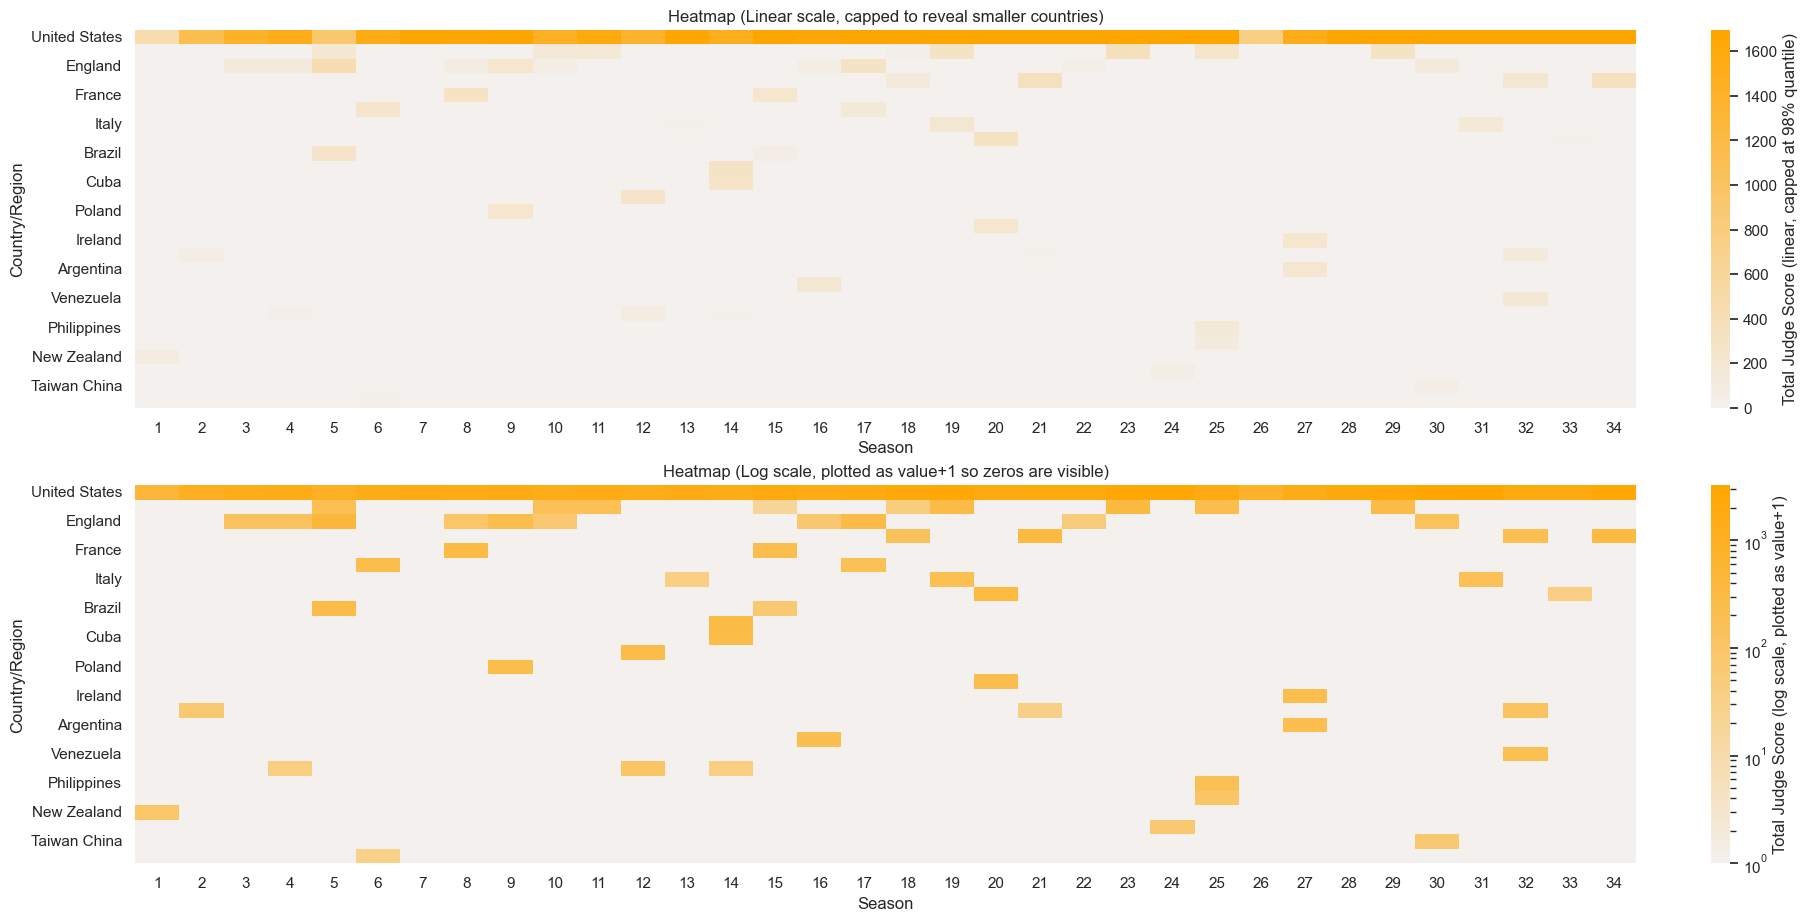

✅ 已导出：heatmap_country_by_season.png
Countries: 26, Seasons: 34


In [4]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

csv_path = "2026_MCM_Problem_C_Data.csv"
df = pd.read_csv(csv_path)

score_cols = [c for c in df.columns if re.match(r"week\d+_judge\d+_score", c)]
df["total_judge_score"] = df[score_cols].sum(axis=1, skipna=True)

grouped = (
    df.groupby(["season", "celebrity_homecountry/region"], as_index=False)["total_judge_score"]
      .sum()
)

pivot = grouped.pivot_table(
    index="season",
    columns="celebrity_homecountry/region",
    values="total_judge_score",
    aggfunc="sum"
).sort_index()

pivot = pivot.reindex(range(1, 35))

mat = pivot.T

mat = mat.loc[mat.sum(axis=1, skipna=True).sort_values(ascending=False).index]

mat = mat.fillna(0)


fig_w = 18
fig, axes = plt.subplots(2, 1, figsize=(fig_w, fig_h), constrained_layout=True)

cmap = sns.light_palette("orange", as_cmap=True)

sns.heatmap(
    mat,
    ax=axes[0],
    cmap=cmap,
    vmin=0,
    vmax=vmax_linear,
    linewidths=0.0,
    linecolor=None,
    cbar_kws={"label": "Total Judge Score (linear, capped at 98% quantile)"}
)
axes[0].set_title("Heatmap (Linear scale, capped to reveal smaller countries)")
axes[0].set_xlabel("Season")
axes[0].set_ylabel("Country/Region")

mat_log = mat + 1
sns.heatmap(
    mat_log,
    ax=axes[1],
    cmap=cmap,
    norm=LogNorm(vmin=1, vmax=mat_log.values.max()),
    linewidths=0.0,
    linecolor=None,
    cbar_kws={"label": "Total Judge Score (log scale, plotted as value+1)"}
)
axes[1].set_title("Heatmap (Log scale, plotted as value+1 so zeros are visible)")
axes[1].set_xlabel("Season")
axes[1].set_ylabel("Country/Region")

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

out_path = "heatmap_country_by_season.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"✅ 已导出：{out_path}")
print(f"Countries: {mat.shape[0]}, Seasons: {mat.shape[1]}")


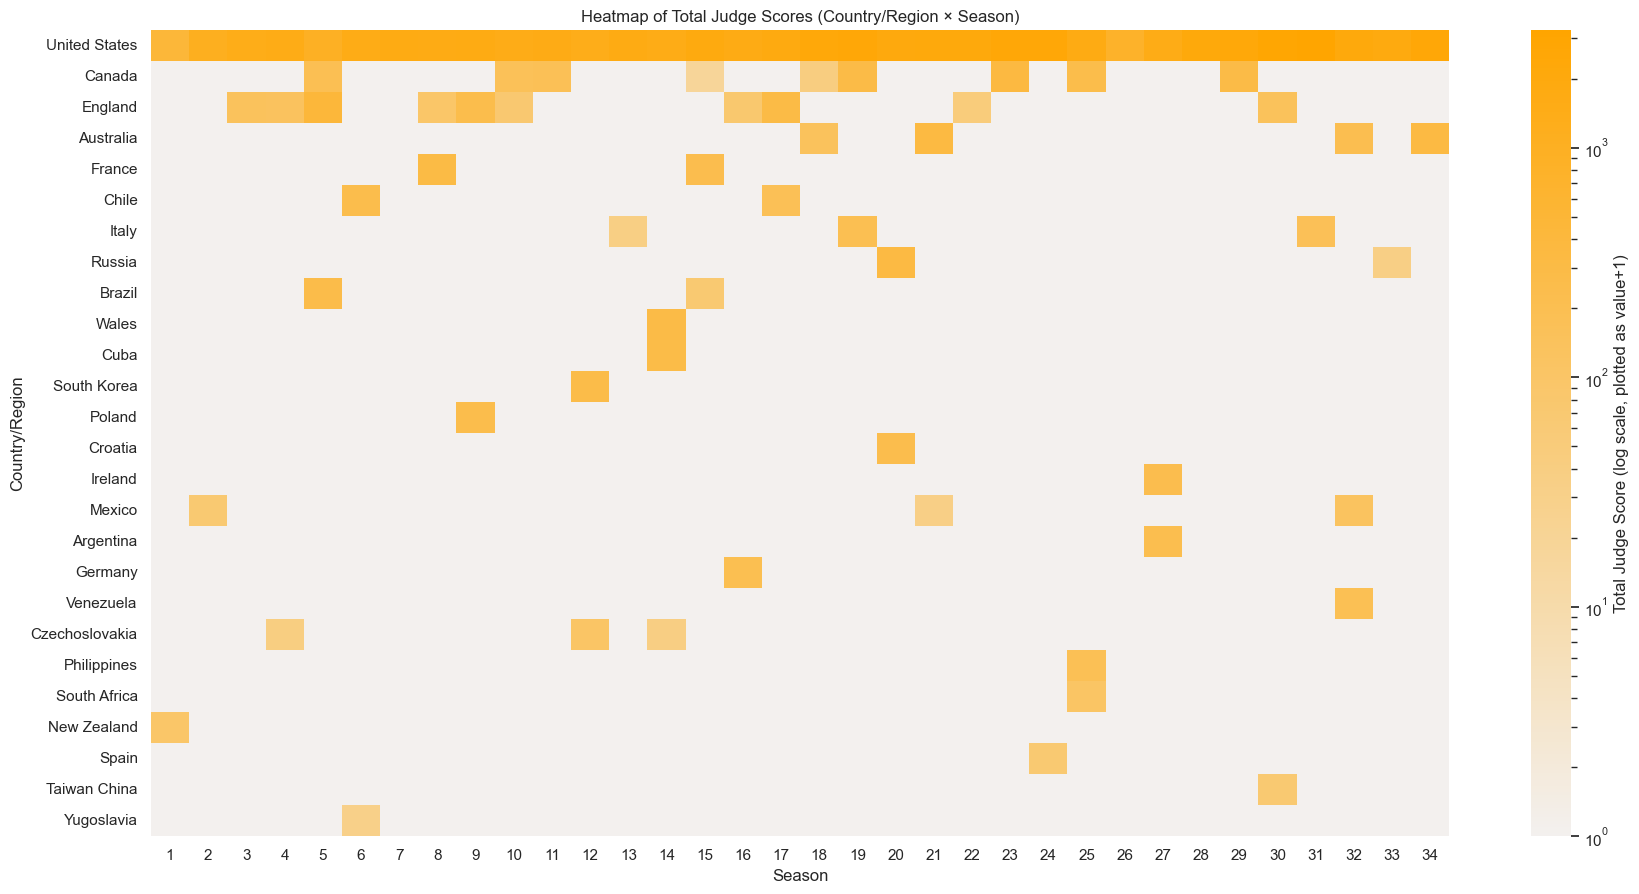

✅ 已导出：heatmap_country_by_season.png
✅ 国家数量（完整）：26
✅ season 数量：34


In [5]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

csv_path = "2026_MCM_Problem_C_Data.csv"
df = pd.read_csv(csv_path)

country_col = "celebrity_homecountry/region"
df[country_col] = df[country_col].astype("string").fillna("Unknown").str.strip()

all_countries = sorted(df[country_col].unique().tolist())

score_cols = [c for c in df.columns if re.match(r"week\d+_judge\d+_score", c)]
if len(score_cols) == 0:
    raise ValueError("没找到 weekX_judgeY_score 这种列名，请检查 CSV 列名是否一致。")

df["total_judge_score"] = df[score_cols].sum(axis=1, skipna=True)

grouped = (
    df.groupby(["season", country_col], as_index=False)["total_judge_score"]
      .sum()
)

pivot = grouped.pivot_table(
    index="season",
    columns=country_col,
    values="total_judge_score",
    aggfunc="sum"
)

pivot = pivot.reindex(range(1, 35))

pivot = pivot.reindex(columns=all_countries)

pivot = pivot.fillna(0)

mat = pivot.T

mat = mat.loc[mat.sum(axis=1).sort_values(ascending=False).index]

sns.set_theme(style="white")

cmap = sns.light_palette("orange", as_cmap=True)

fig_w = 18
fig_h = max(7, 0.35 * mat.shape[0])
plt.figure(figsize=(fig_w, fig_h))
ax = plt.gca()

mat_log = mat + 1

sns.heatmap(
    mat_log,
    ax=ax,
    cmap=cmap,
    norm=LogNorm(vmin=1, vmax=mat_log.values.max()),
    linewidths=0.0,
    cbar_kws={"label": "Total Judge Score (log scale, plotted as value+1)"}
)

ax.set_title("Heatmap of Total Judge Scores (Country/Region × Season)")
ax.set_xlabel("Season")
ax.set_ylabel("Country/Region")

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()

out_path = "heatmap_country_by_season.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"✅ 已导出：{out_path}")
print(f"✅ 国家数量（完整）：{mat.shape[0]}")
print(f"✅ season 数量：{mat.shape[1]}")


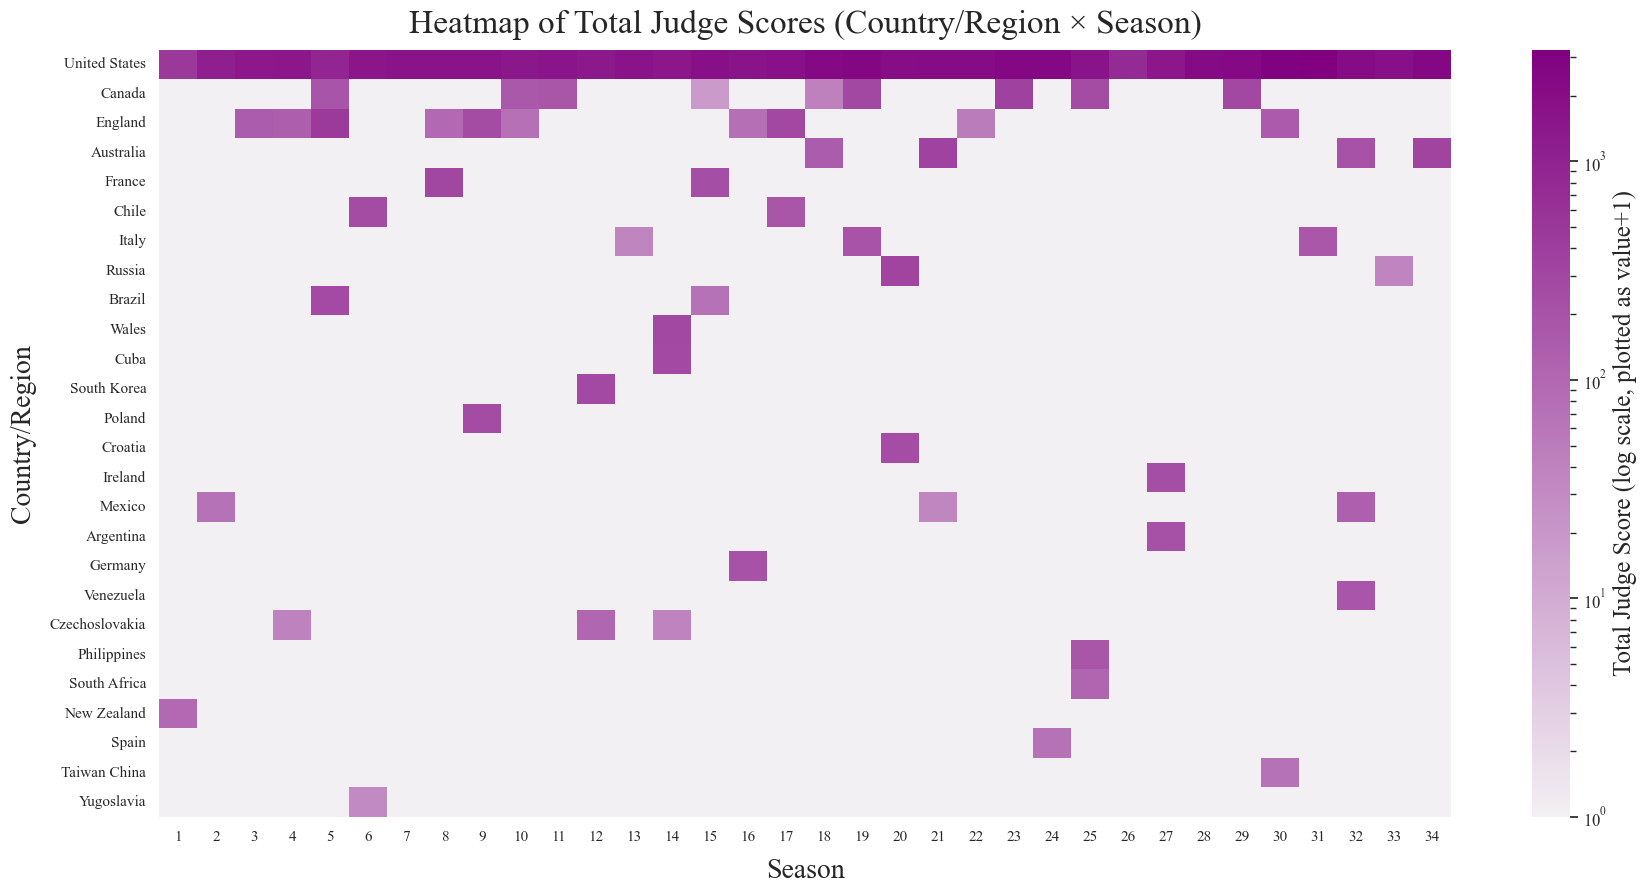

✅ 已导出：heatmap_country_by_season.png
✅ 国家数量（完整）：26
✅ season 数量：34


In [6]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm





import matplotlib as mpl
import seaborn as sns

sns.set_theme(
    style="white",
    font="Times New Roman",
    rc={
        "font.family": "Times New Roman",
        "font.serif": ["Times New Roman"],
        "axes.unicode_minus": False,
    }
)

mpl.rcParams.update({
    "font.family": "Times New Roman",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "axes.unicode_minus": False,
})





mpl.rcParams.update({
    "font.family": "Times New Roman",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "axes.unicode_minus": False,
})


csv_path = "2026_MCM_Problem_C_Data.csv"
df = pd.read_csv(csv_path)

country_col = "celebrity_homecountry/region"
df[country_col] = df[country_col].astype("string").fillna("Unknown").str.strip()

all_countries = sorted(df[country_col].unique().tolist())

score_cols = [c for c in df.columns if re.match(r"week\d+_judge\d+_score", c)]
if len(score_cols) == 0:
    raise ValueError("没找到 weekX_judgeY_score 这种列名，请检查 CSV 列名是否一致。")

df["total_judge_score"] = df[score_cols].sum(axis=1, skipna=True)

grouped = (
    df.groupby(["season", country_col], as_index=False)["total_judge_score"]
      .sum()
)

pivot = grouped.pivot_table(
    index="season",
    columns=country_col,
    values="total_judge_score",
    aggfunc="sum"
)

pivot = pivot.reindex(range(1, 35))

pivot = pivot.reindex(columns=all_countries)

pivot = pivot.fillna(0)

mat = pivot.T

mat = mat.loc[mat.sum(axis=1).sort_values(ascending=False).index]



cmap = sns.light_palette("purple", as_cmap=True)


fig_w = 18
fig_h = max(7, 0.35 * mat.shape[0])
fig, ax = plt.subplots(figsize=(fig_w, fig_h))

mat_log = mat + 1

hm = sns.heatmap(
    mat_log,
    ax=ax,
    cmap=cmap,
    norm=LogNorm(vmin=1, vmax=mat_log.values.max()),
    linewidths=0.0,
    cbar_kws={"label": "Total Judge Score (log scale, plotted as value+1)"}
)

ax.set_title("Heatmap of Total Judge Scores (Country/Region × Season)", fontsize=FS_TITLE, pad=12)
ax.set_xlabel("Season", fontsize=FS_AXIS_LABEL, labelpad=10)
ax.set_ylabel("Country/Region", fontsize=FS_AXIS_LABEL, labelpad=10)

ax.tick_params(axis="x", labelrotation=0, labelsize=FS_TICK)
ax.tick_params(axis="y", labelsize=FS_TICK)

cbar = hm.collections[0].colorbar
cbar.ax.yaxis.label.set_size(FS_CBAR_LABEL)
cbar.ax.tick_params(labelsize=FS_CBAR_TICK)

plt.tight_layout()

out_path = "heatmap_country_by_season.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"✅ 已导出：{out_path}")
print(f"✅ 国家数量（完整）：{mat.shape[0]}")
print(f"✅ season 数量：{mat.shape[1]}")


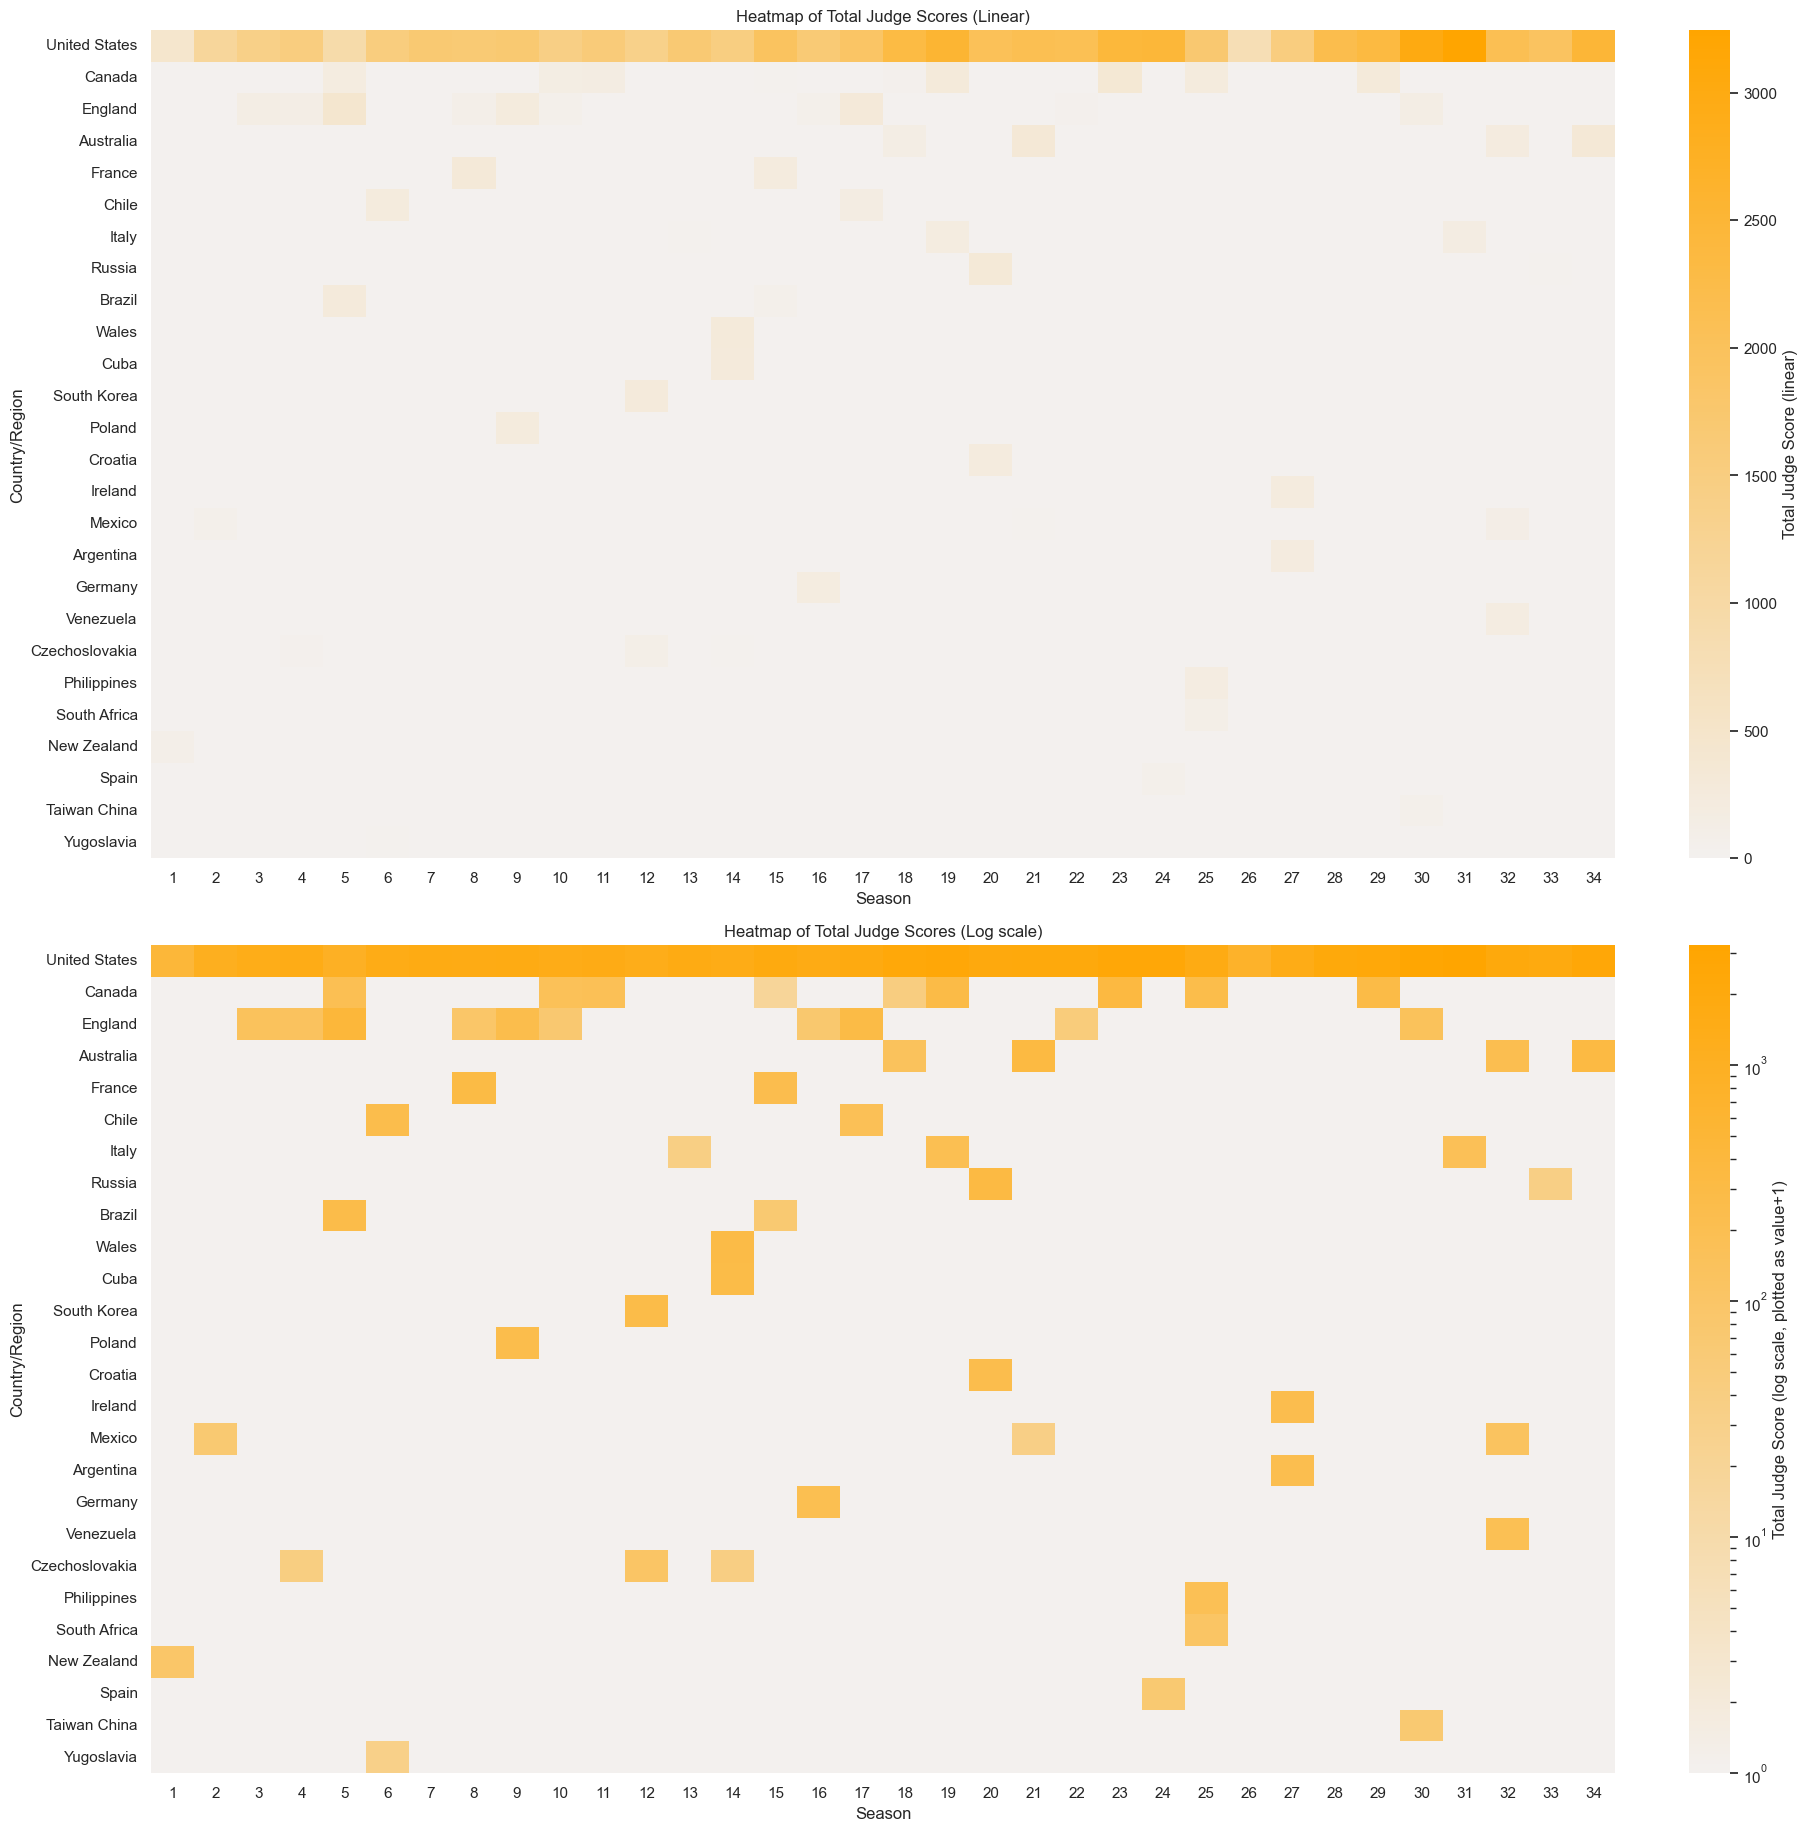

✅ 已导出：heatmap_country_by_season_linear_and_log.png
✅ 国家数量（完整）：26
✅ season 数量：34


In [3]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

csv_path = "2026_MCM_Problem_C_Data.csv"
df = pd.read_csv(csv_path)

country_col = "celebrity_homecountry/region"
df[country_col] = df[country_col].astype("string").fillna("Unknown").str.strip()

all_countries = sorted(df[country_col].unique().tolist())

score_cols = [c for c in df.columns if re.match(r"week\d+_judge\d+_score", c)]
if len(score_cols) == 0:
    raise ValueError("没找到 weekX_judgeY_score 这种列名，请检查 CSV 列名是否一致。")

df["total_judge_score"] = df[score_cols].sum(axis=1, skipna=True)

grouped = (
    df.groupby(["season", country_col], as_index=False)["total_judge_score"]
      .sum()
)

pivot = grouped.pivot_table(
    index="season",
    columns=country_col,
    values="total_judge_score",
    aggfunc="sum"
)

pivot = pivot.reindex(range(1, 35))

pivot = pivot.reindex(columns=all_countries)

pivot = pivot.fillna(0)

mat = pivot.T

mat = mat.loc[mat.sum(axis=1).sort_values(ascending=False).index]


cmap = sns.light_palette("orange", as_cmap=True)

fig_w = 18
fig, axes = plt.subplots(
    2, 1,
    figsize=(fig_w, fig_h_each * 2),
    constrained_layout=True
)

sns.heatmap(
    mat,
    ax=axes[0],
    cmap=cmap,
    vmin=0,
    linewidths=0.0,
    cbar_kws={"label": "Total Judge Score (linear)"}
)
axes[0].set_title("Heatmap of Total Judge Scores (Linear)")
axes[0].set_xlabel("Season")
axes[0].set_ylabel("Country/Region")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

mat_log = mat + 1
sns.heatmap(
    mat_log,
    ax=axes[1],
    cmap=cmap,
    norm=LogNorm(vmin=1, vmax=mat_log.values.max()),
    linewidths=0.0,
    cbar_kws={"label": "Total Judge Score (log scale, plotted as value+1)"}
)
axes[1].set_title("Heatmap of Total Judge Scores (Log scale)")
axes[1].set_xlabel("Season")
axes[1].set_ylabel("Country/Region")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

out_path = "heatmap_country_by_season_linear_and_log.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"✅ 已导出：{out_path}")
print(f"✅ 国家数量（完整）：{mat.shape[0]}")
print(f"✅ season 数量：{mat.shape[1]}")
